In [1]:
import numpy as np
import scipy.stats


from noise3d import genseq
from noise3d import noise
from noise3d import bias

import matplotlib.pyplot as plt


In [18]:
import numpy as np
import scipy.stats


from noise3d import genseq
from noise3d import noise
from noise3d import bias

import matplotlib.pyplot as plt

def compute_results(var_vh, V, H, T, N, ddof):

    vec_bsf = []
    vec_xy = []
    for n in range(N):
        seq = genseq.genseq_3dnoise_seq(T, V, H, (0, 0, 0, 0, 0, var_vh, 0))
        # Mesure de la variance empirique non biasiée
        vec_bsf.append(noise.var_fpn(seq, axis=0, ddof=ddof))
        #vec_xy.append(noise.var_nvh(seq, ddof=ddof))
    vec_bsf = np.asarray(vec_bsf)
    #vec_xy = np.asarray(vec_xy)
    
    ech = np.linspace(np.min(vec_bsf), np.max(vec_bsf), 100)
    val, bins, patchs = plt.hist(vec_bsf, bins=ech, density=True)
    #val, bins, patchs = plt.hist(vec_xy, bins=ech, density=True)
    
 
   # valeur attendue 
    exp_mean = var_vh*(V*H-1)/(V*H-ddof)
    exp_var = 2*var_vh**2/(V*H-1)

    mean = np.mean(vec_bsf)
    var = np.var(vec_bsf)
    
    ech_gauss = noise.gauss(ech, mean, np.sqrt(var))
    ech_gauss2 = noise.gauss(ech, exp_mean, np.sqrt(exp_var))
    ech_chi2 = scipy.stats.chi2.pdf(ech,
                                    df=(V*H), 
                                    loc=0, 
                                    scale=var_vh**2/(V*H))
    plt.plot(ech, ech_gauss, 'o')
    plt.plot(ech, ech_gauss2)
    plt.plot(ech, ech_chi2)
        

    
    print("Valeur attendue : {}".format(var_vh))
    print("Moyenne des variances mesurée : {}".format(mean))
    print("Moyenne des variances attendue : {}".format(exp_mean))
    print("Variance des variances mesurée : {}".format(var))
    print("Variance des variances attendue : {}".format(exp_var))



# 4 par 4

Valeur attendue : 1
Moyenne des variances mesurée : 0.9994530337496629
Moyenne des variances attendue : 1.0
Variance des variances mesurée : 0.13383504828561846
Variance des variances attendue : 0.13333333333333333


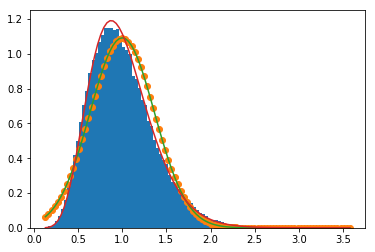

In [23]:
T = 1
V = 4
H = 4
var = 1
ddof = 1
N = 100000


compute_results(var, V, H, T, N, ddof)


# 10 par 10

Valeur attendue : 1
Moyenne des variances mesurée : 1.0007506717610157
Moyenne des variances attendue : 1.0
Variance des variances mesurée : 0.02012392948367804
Variance des variances attendue : 0.020202020202020204


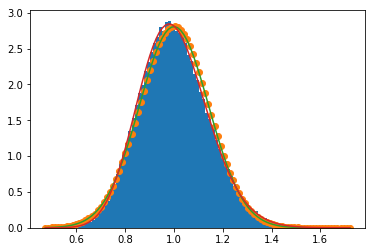

In [20]:
T = 1
V = 10
H = 10
var = 1
ddof = 1
N = 100000


compute_results(var, V, H, T, N, ddof)


## 100 par 100

Valeur attendue : 1
Moyenne des variances mesurée : 1.0000431298539636
Moyenne des variances attendue : 1.0
Variance des variances mesurée : 0.0002009568919628638
Variance des variances attendue : 0.00020002000200020003


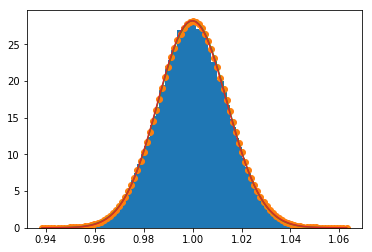

In [22]:
T = 1
V = 100
H = 100
var = 1
ddof = 1
N = 100000


compute_results(var, V, H, T, N, ddof)


# Avec ddof=0

Valeur attendue : 1
Moyenne des variances mesurée : 0.9998804088516048
Moyenne des variances attendue : 0.9999
Variance des variances mesurée : 0.00020207612140372522


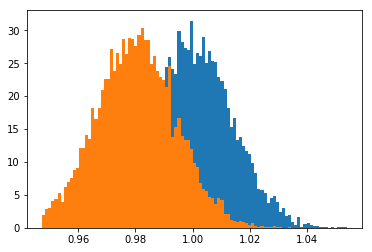

In [8]:
T = 1
V = 100
H = 100
var = 1
ddof = 0
N = 10000


compute_results(var, V, H, T, N, ddof)


In [ ]:
T = 100
V = 100
H = 100
var = 1
ddof = 0
N = 10000


compute_results(var, V, H, T, N, ddof)
